In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


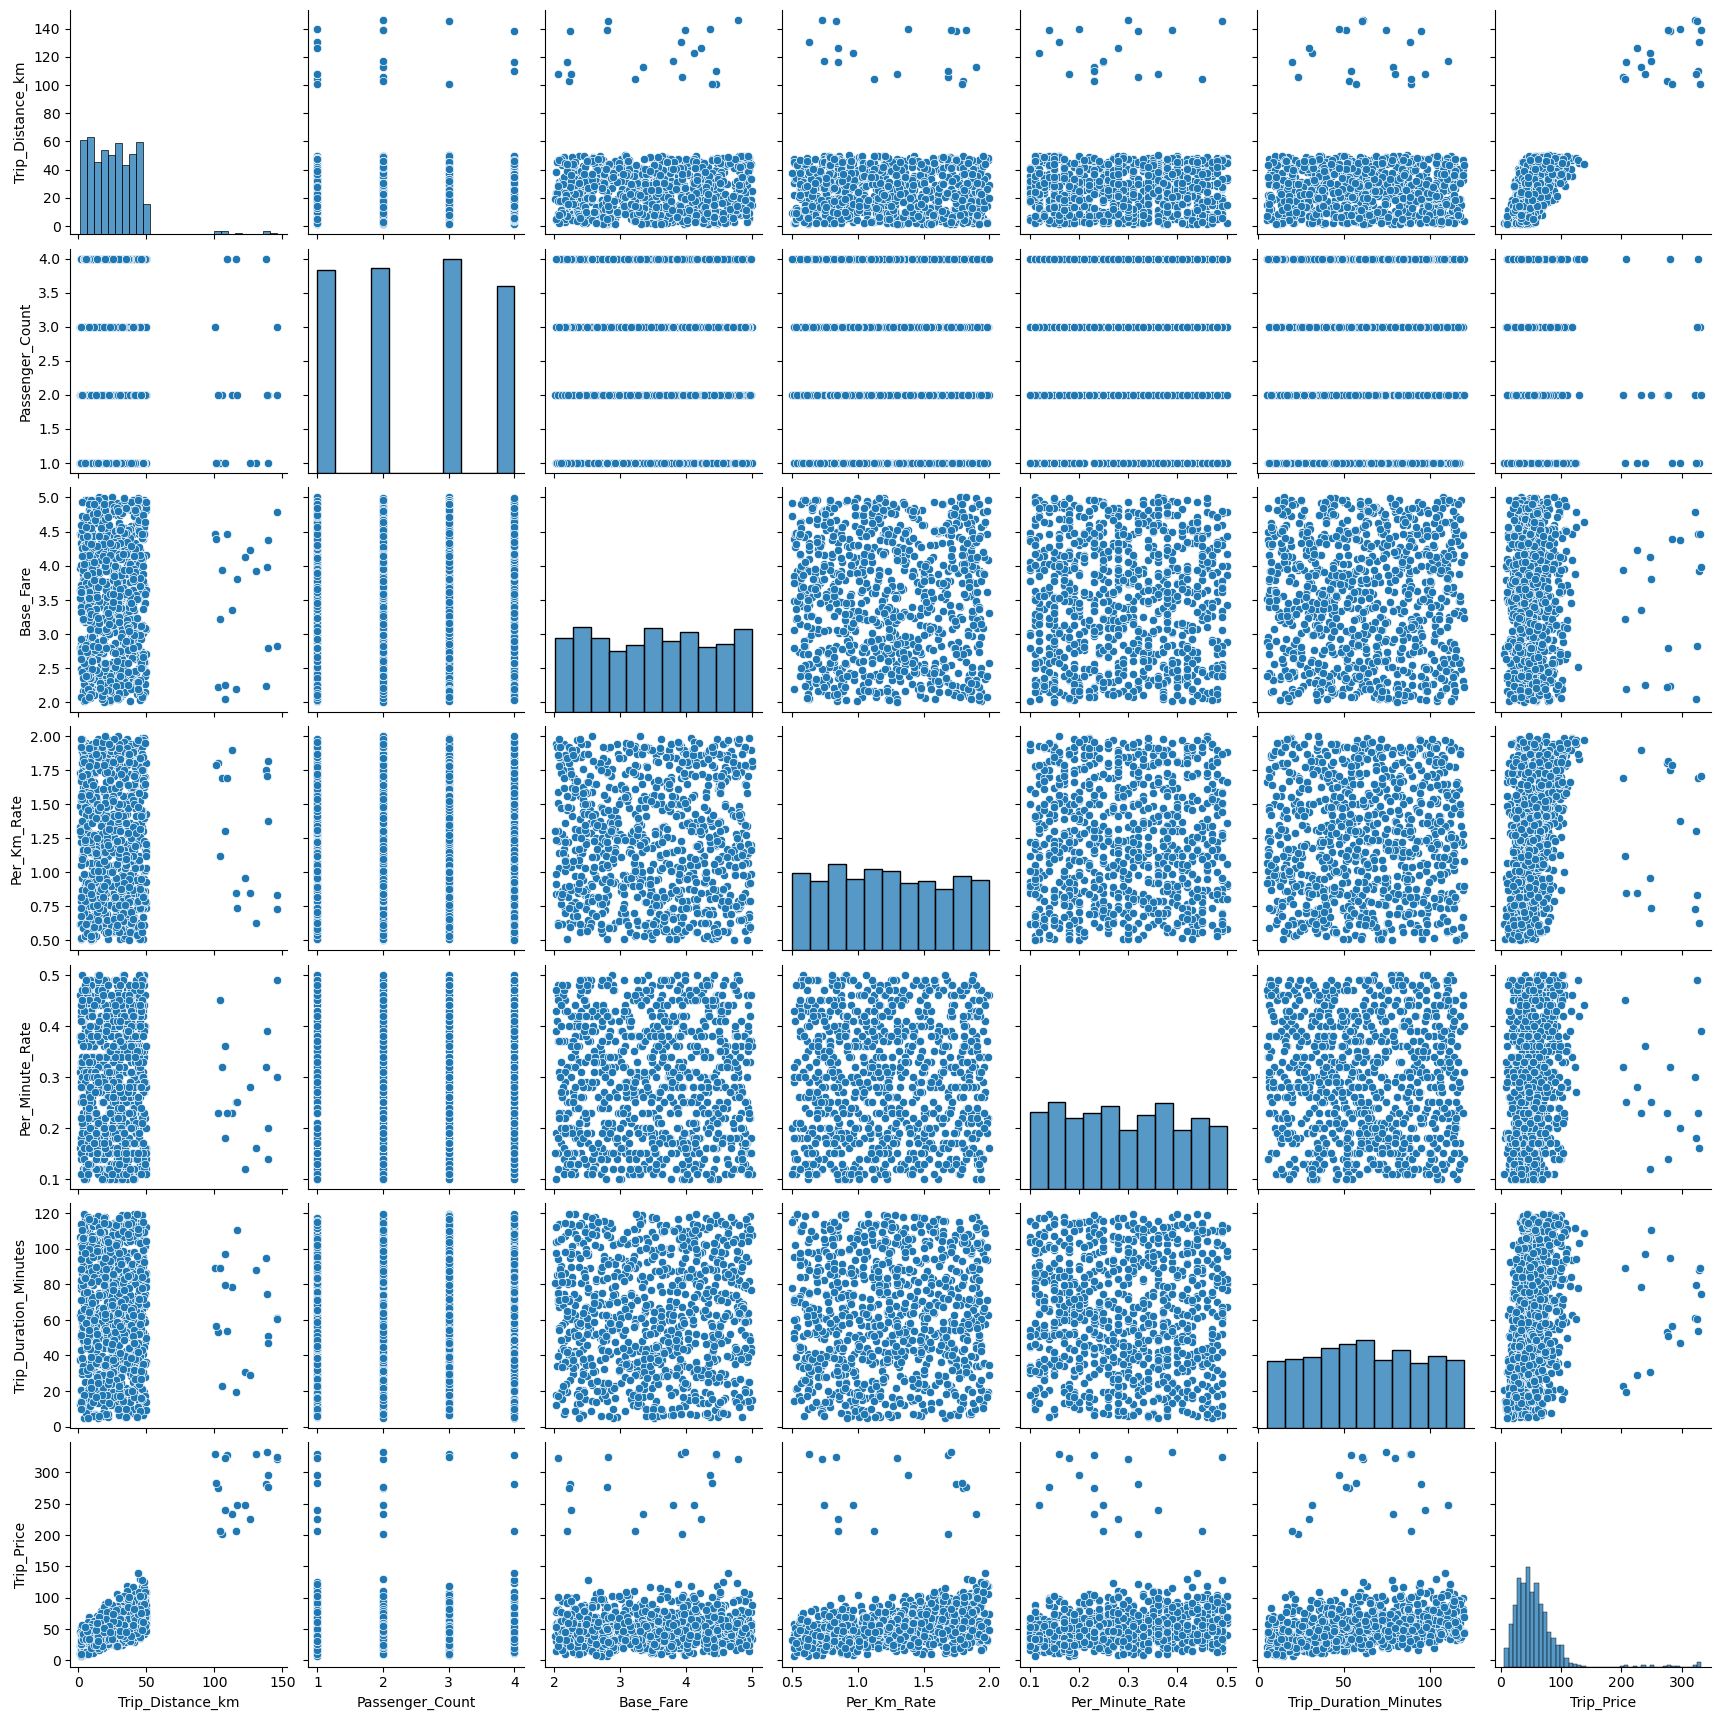

In [6]:
sns.pairplot(df)
plt.show()

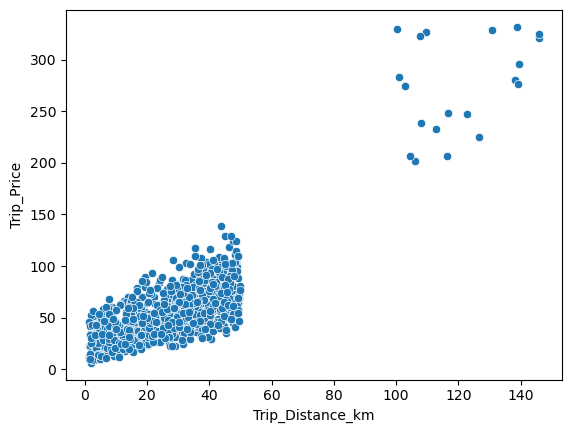

In [7]:
sns.scatterplot(x=df["Trip_Distance_km"],y=df["Trip_Price"])
plt.show()

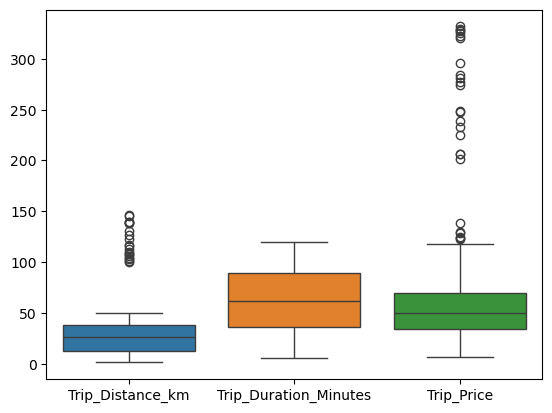

In [8]:
sns.boxplot(df[["Trip_Distance_km","Trip_Duration_Minutes","Trip_Price"]])
plt.show()

In [9]:
# removing outlier data

# df = df[(df["Trip_Price"] <= 150) | (df["Trip_Price"].isnull())]
df = df[(df["Trip_Price"] <= 150)]

In [10]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              47
Day_of_Week              46
Passenger_Count          47
Traffic_Conditions       50
Weather                  45
Base_Fare                44
Per_Km_Rate              42
Per_Minute_Rate          47
Trip_Duration_Minutes    46
Trip_Price                0
dtype: int64

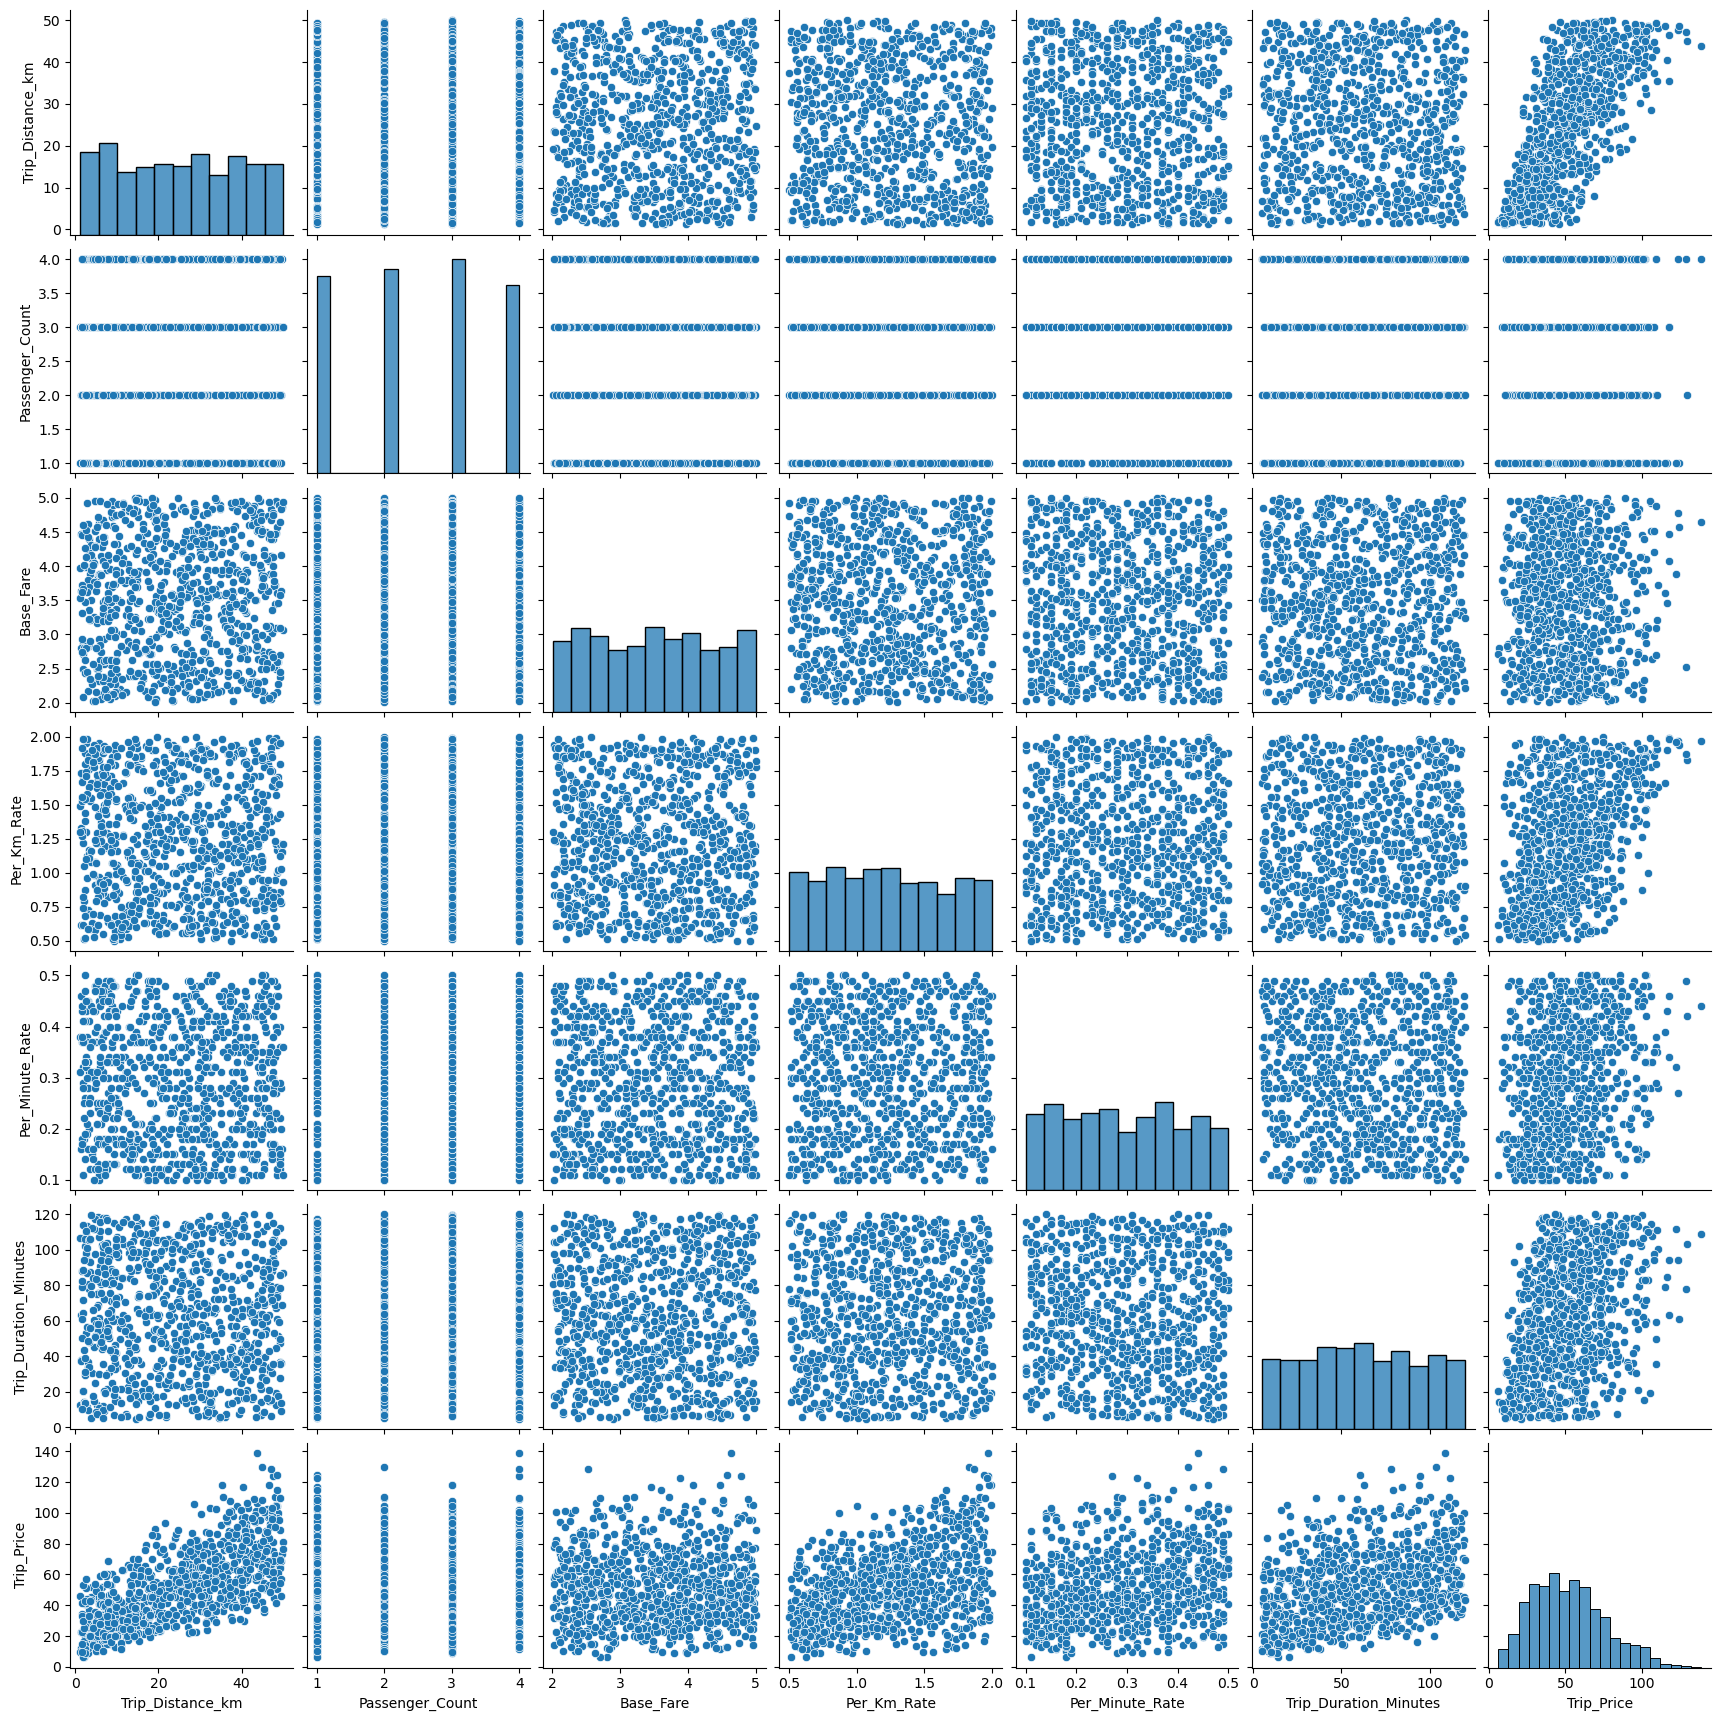

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
numerical_columns=["Trip_Distance_km","Passenger_Count","Base_Fare","Per_Km_Rate","Per_Minute_Rate","Trip_Duration_Minutes","Trip_Price"]
for col in numerical_columns:
    print(df[col].value_counts())

Trip_Distance_km
3.22     3
3.00     3
32.04    3
9.91     3
13.64    3
        ..
5.49     1
45.95    1
7.70     1
47.56    1
9.15     1
Name: count, Length: 807, dtype: int64
Passenger_Count
3.0    235
2.0    225
1.0    217
4.0    207
Name: count, dtype: int64
Base_Fare
3.94    9
3.88    8
2.32    8
2.43    7
2.80    7
       ..
2.18    1
3.19    1
3.04    1
3.81    1
2.67    1
Name: count, Length: 285, dtype: int64
Per_Km_Rate
0.63    14
1.50    12
0.82    11
1.90    11
0.79    11
        ..
1.99     2
0.50     2
2.00     2
1.51     2
1.68     2
Name: count, Length: 150, dtype: int64
Per_Minute_Rate
0.15    32
0.28    31
0.38    30
0.18    30
0.12    29
0.23    26
0.31    26
0.20    26
0.42    26
0.11    24
0.17    24
0.37    23
0.36    22
0.30    22
0.34    22
0.40    22
0.19    22
0.26    22
0.46    21
0.39    21
0.33    21
0.49    21
0.43    20
0.22    20
0.48    20
0.44    20
0.45    20
0.47    19
0.21    19
0.14    19
0.24    19
0.35    19
0.41    19
0.16    19
0.27    19
0.32 

In [13]:
categorical_columns=["Time_of_Day","Day_of_Week","Traffic_Conditions","Weather"]
for col in categorical_columns:
    print(df[col].value_counts())

Time_of_Day
Afternoon    342
Morning      261
Evening      194
Night         87
Name: count, dtype: int64
Day_of_Week
Weekday    607
Weekend    278
Name: count, dtype: int64
Traffic_Conditions
Low       367
Medium    350
High      164
Name: count, dtype: int64
Weather
Clear    623
Rain     209
Snow      54
Name: count, dtype: int64


In [14]:
# filling missing data

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean())
df['Passenger_Count'] = df['Passenger_Count'].fillna(df['Passenger_Count'].median())
df['Base_Fare'] = df['Base_Fare'].fillna(df['Base_Fare'].mean())
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean())
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean())
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean())
#df['Trip_Price'] = df['Trip_Price'].fillna(df['Trip_Price'].mean())
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [15]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [16]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,25.069205,2.489259,3.497430,1.228358,0.294344,61.991367,52.181554
std,13.990936,1.072076,0.845168,0.419566,0.112698,31.638233,24.091073
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.880000,2.000000,2.765000,0.870000,0.200000,36.595000,33.390700
50%,25.069205,2.500000,3.497430,1.228358,0.294344,61.991367,48.835000
75%,37.115000,3.000000,4.170000,1.570000,0.390000,87.850000,67.069500
max,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,138.642500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       931 non-null    float64
 1   Time_of_Day            931 non-null    object 
 2   Day_of_Week            931 non-null    object 
 3   Passenger_Count        931 non-null    float64
 4   Traffic_Conditions     931 non-null    object 
 5   Weather                931 non-null    object 
 6   Base_Fare              931 non-null    float64
 7   Per_Km_Rate            931 non-null    float64
 8   Per_Minute_Rate        931 non-null    float64
 9   Trip_Duration_Minutes  931 non-null    float64
 10  Trip_Price             931 non-null    float64
dtypes: float64(7), object(4)
memory usage: 87.3+ KB


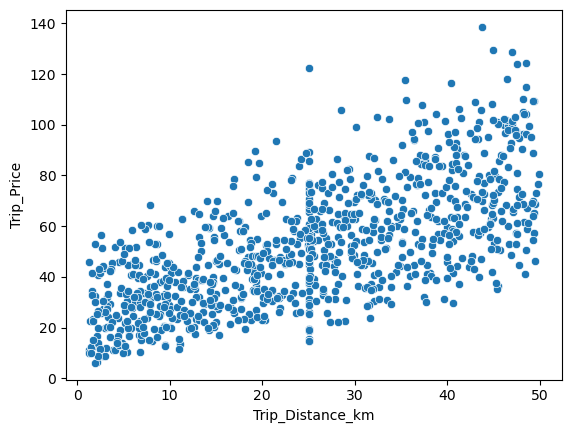

In [18]:
sns.scatterplot(x=df["Trip_Distance_km"],y=df["Trip_Price"])
plt.show()

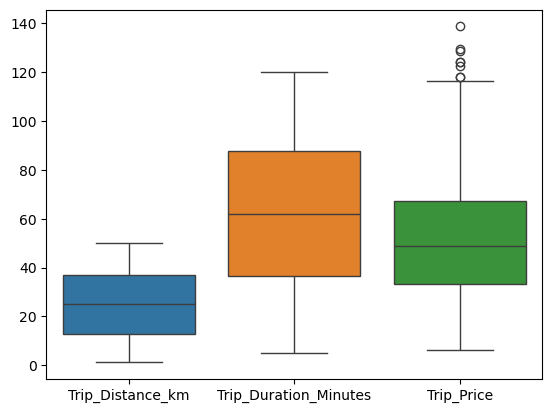

In [19]:
sns.boxplot(df[["Trip_Distance_km","Trip_Duration_Minutes","Trip_Price"]])
plt.show()

In [20]:
for col in categorical_columns:
    print(col)
    print(df[col].unique())

Time_of_Day
['Morning' 'Evening' 'Afternoon' 'Night']
Day_of_Week
['Weekday' 'Weekend']
Traffic_Conditions
['Low' 'High' 'Medium']
Weather
['Clear' 'Rain' 'Snow']


In [21]:
# independent and dependent features

X=df.drop("Trip_Price",axis=1)
y=df["Trip_Price"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

nominal_cols = ['Time_of_Day', 'Weather', 'Day_of_Week'] 
ordinal_cols = ['Traffic_Conditions'] 
traffic_order = ['Low', 'Medium', 'High'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', 
         OneHotEncoder(handle_unknown='ignore', 
                       sparse_output=False, 
                       drop='if_binary'),
         nominal_cols),
        
        ('ordinal', 
         OrdinalEncoder(categories=[traffic_order],
                        handle_unknown='use_encoded_value', 
                        unknown_value=-1), 
         ordinal_cols)
    ],
    remainder='passthrough'
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

In [24]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   onehot__Time_of_Day_Afternoon     698 non-null    float64
 1   onehot__Time_of_Day_Evening       698 non-null    float64
 2   onehot__Time_of_Day_Morning       698 non-null    float64
 3   onehot__Time_of_Day_Night         698 non-null    float64
 4   onehot__Weather_Clear             698 non-null    float64
 5   onehot__Weather_Rain              698 non-null    float64
 6   onehot__Weather_Snow              698 non-null    float64
 7   onehot__Day_of_Week_Weekend       698 non-null    float64
 8   ordinal__Traffic_Conditions       698 non-null    float64
 9   remainder__Trip_Distance_km       698 non-null    float64
 10  remainder__Passenger_Count        698 non-null    float64
 11  remainder__Base_Fare              698 non-null    float64
 12  remainde

In [25]:
# scaler

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_df)
X_test_scaled=scaler.transform(X_test_df)

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mae:",mean_absolute_error(y_test, y_pred))
print("mse:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test, y_pred))

mae: 7.551250643776824
mse: 107.47319376480687
r2_score: 0.7982250239453313


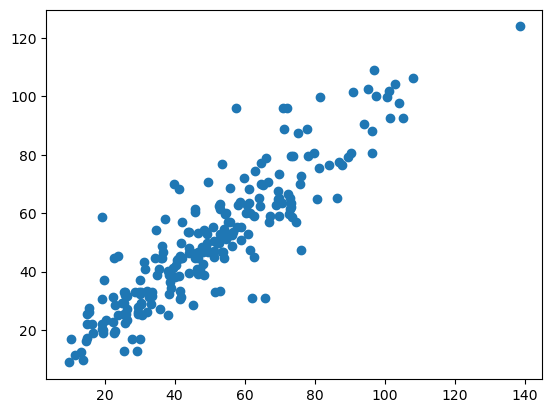

In [28]:
plt.scatter(y_test,y_pred)
plt.show();

In [29]:
# hyperparameter tuning

In [30]:
param={
    "criterion":["squared_error","absolute_error","friedman_mse","poisson"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,15,None],
    "max_features":["sqrt","log2",None]
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param,cv=5,scoring="r2")
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [31]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'best'}

In [32]:
y_pred=tree_model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mae:",mean_absolute_error(y_test, y_pred))
print("mse:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test, y_pred))

mae: 7.551250643776824
mse: 107.47319376480687
r2_score: 0.7982250239453313


In [33]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=7,algorithm="auto")
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score: ",r2_score(y_test,y_pred))
print("mae: ",mean_absolute_error(y_test,y_pred))
print("mse: ",mean_squared_error(y_test,y_pred))

r2 score:  0.6426538821753425
mae:  10.820073145309625
mse:  190.33642978436285


In [34]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 6.991127545129137
mse: 84.47753972156933
r2_score: 0.8413980923300833


In [35]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("lasso")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

lasso
mae: 7.0104497014766265
mse: 85.41635116098294
r2: 0.8396355257860754


In [36]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("ridge")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

ridge
mae: 6.991340280763328
mse: 84.46180661115689
r2: 0.841427630374553


In [37]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("elasticnet")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

elasticnet
mae: 9.563942643983639
mse: 143.1598061065246
r2: 0.7312253833979387


In [38]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 11.147962625696014
mse: 214.1622398703819
r2_score: 0.5979222417431231


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.001],
    "kernel":["rbf","linear"]
}

grid=GridSearchCV(estimator=SVR(),param_grid=param_grid,n_jobs=-1,verbose=3)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [40]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [41]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=1000,gamma=0.001)
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 5.700807271935951
mse: 61.16928005881403
r2_score: 0.8851580604726556


In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 3.3102175744999704
mse: 36.119357227147894
r2_score: 0.9321879048689413
